In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [103]:
def do_regression(X,Y):
    regression = linear_model.LinearRegression()
    regression.fit(X,Y)
    print("Coefficients:\n",regression.coef_)
    print("\nIntercept:",regression.intercept_)
    print("\nR^2 Value:",regression.score(X,Y))

def show_skew(X,Y):
    regression = linear_model.LinearRegression()
    regression.fit(X,Y)
    predicted = regression.predict(X).ravel()
    actual = Y
    residual = actual - predicted
    f = plt.figure(figsize=(20,5))
    plt.subplot(131)
    sns.distplot(residual,bins=50)
    plt.title('Residual Counts')
    plt.xlabel('Residual')
    plt.ylabel('Count')
    plt.subplot(132)
    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    plt.show()    

In [104]:
# Read in data
df = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\FBI_Table_Drill\data.csv',skiprows=4)

# Drop columns with lots of NA values
df = df.drop(['Rape\n(revised\ndefinition)1','Arson3'],axis=1)

# Then drop other rows with NA values from dataframe
df =df.dropna()

# Collect only needed data into new dataframe with better names
data = pd.DataFrame(df['Population'])
data[['Burglary','Car_Theft','Larceny','Property_Crime']]= df[['Burglary','Motor\nvehicle\ntheft','Larceny-\ntheft','Property\ncrime']]

# Calculate Per Capita values for variables of interest
data['PropCrime_PC'] = data.loc[:,'Property_Crime'] / data.loc[:,'Population']
data['Burglary_PC'] = data.loc[:,'Burglary'] / data.loc[:,'Population']
data['CarTheft_PC'] = data.loc[:,'Car_Theft'] / data.loc[:,'Population']
data['Larceny_PC'] = data.loc[:,'Larceny'] / data.loc[:,'Population']

In [105]:
# Collect variables for Regression and show model 
Y = data['PropCrime_PC']
X = data[['Burglary_PC','CarTheft_PC','Larceny_PC']]
do_regression(X,Y)

Coefficients:
 [1. 1. 1.]

Intercept: -3.469446951953614e-18

R^2 Value: 1.0


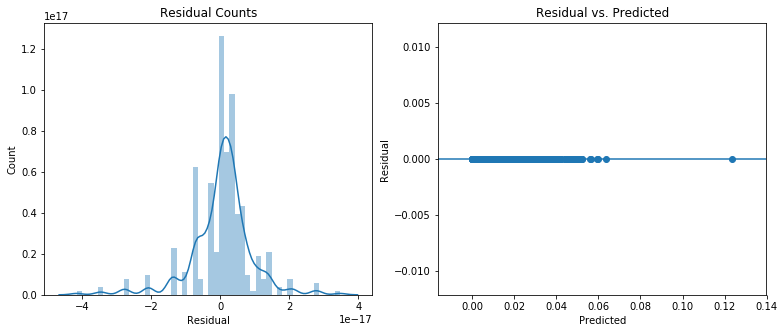

In [106]:
show_skew(X,Y)

In [107]:
# Read in test data 
states = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\FBI_Table_Drill\Test_Data\STATES_2013.csv',skiprows=3)
NY_2014 = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\FBI_Table_Drill\Test_Data\\NY_2014.csv',skiprows=4)

In [108]:
# Start by cleaning states data 
states.head(n=5)

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,ALABAMA,Abbeville,"2,645",11,1.0,1,NaN,2,7,63,21,39,3,NaN,NaN,NaN,NaN
1,NaN,Adamsville,"4,481",19,1.0,0,NaN,7,11,321,58,252,11,NaN,NaN,NaN,
2,NaN,Addison,744,1,0.0,1,NaN,0,0,25,6,17,2,NaN,NaN,NaN,
3,NaN,Alabaster,"31,170",44,0.0,2,NaN,11,31,640,70,544,26,NaN,NaN,NaN,NaN
4,NaN,Alexander City,"14,692",119,2.0,16,NaN,12,89,661,121,510,30,NaN,NaN,NaN,NaN


In [109]:
# Check to see which columns contain NA values
states.isna().sum()

State                                     9242
City                                        10
Population                                  13
Violent\ncrime                              14
Murder and\nnonnegligent\nmanslaughter      10
Rape\n(revised\ndefinition)1              3871
Rape\n(legacy\ndefinition)2               5443
Robbery                                     10
Aggravated\nassault                         13
Property\ncrime                             14
Burglary                                    12
Larceny-\ntheft                             12
Motor\nvehicle\ntheft                       10
Arson3                                     483
Unnamed: 14                               9302
Unnamed: 15                               9302
Unnamed: 16                               9300
dtype: int64

In [110]:
# Collect only needed columns for model and drop NA values from those
states_df = pd.DataFrame(states['Population'])
states_df[['Burglary','Larceny','Car_Theft','PropCrime']]=states[['Burglary','Larceny-\ntheft','Motor\nvehicle\ntheft','Property\ncrime']]
states_df = states_df.dropna()

# Look at the data types of states variables 
states_df.dtypes

Population    object
Burglary      object
Larceny       object
Car_Theft     object
PropCrime     object
dtype: object

In [111]:
# Convert all desired data to floats
states_df['Population'] = states_df['Population'].str.replace(",","").astype(float)
states_df['Burglary'] = states_df['Burglary'].str.replace(",","").astype(float)
states_df['Larceny'] = states_df['Larceny'].str.replace(",","").astype(float)
states_df['Car_Theft'] = states_df['Car_Theft'].str.replace(",","").astype(float)
states_df['PropCrime'] = states_df['PropCrime'].str.replace(",","").astype(float)
states_df.dtypes

Population    float64
Burglary      float64
Larceny       float64
Car_Theft     float64
PropCrime     float64
dtype: object

In [112]:
# Calculate Per Capita Values
states_df['Burglary_PC'] = states_df.loc[:,'Burglary'] / states_df.loc[:,'Population']
states_df['Larceny_PC'] = states_df.loc[:,'Larceny'] / states_df.loc[:,'Population']
states_df['CarTheft_PC'] = states_df.loc[:,'Car_Theft'] / states_df.loc[:,'Population']
states_df['PropCrime_PC'] = states_df.loc[:,'PropCrime'] / states_df.loc[:,'Population']

In [113]:
# collect needed inputs for model into new dataframes
target = states_df['PropCrime_PC']
test_df = states_df[['Burglary_PC','CarTheft_PC','Larceny_PC','PropCrime_PC']]
# print model for comparison
do_regression(X,Y)

Coefficients:
 [1. 1. 1.]

Intercept: -3.469446951953614e-18

R^2 Value: 1.0


In [114]:
# Calculate Prediction using formula from model
test_df['PREDICTION'] = (test_df.loc[:,'Burglary_PC'])+(test_df.loc[:,'CarTheft_PC'])+(test_df.loc[:,'Larceny_PC'])-3.469446951953614**-18
test_df[['PropCrime_PC','PREDICTION']].head(n=20)

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PropCrime_PC,PREDICTION
0,0.023819,0.023819
1,0.071636,0.071636
2,0.033602,0.033602
3,0.020533,0.020533
4,0.044990,0.044990
5,0.019843,0.019843
6,0.054081,0.054081
7,0.087778,0.087778
8,0.077155,0.077155
9,0.023773,0.023773


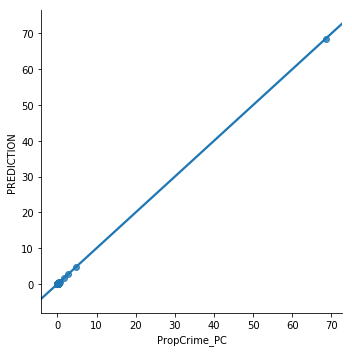

9285 correctly predicted by model out of 9285 entries


In [115]:
# How to predict values / code to use to generate number of correct vs all
# Is this way below acceptable?
correct = test_df[ round(test_df.loc[:,'PREDICTION'],2) == round(test_df.loc[:,'PropCrime_PC'],2)]

sns.lmplot(x='PropCrime_PC',y='PREDICTION',data=test_df)
plt.show()
print("{} correctly predicted by model out of {} entries".format(len(correct),len(test_df)))

In [116]:
NY_2014.head(n=5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,851",0,0.0,NaN,0.0,0,0,11,1,10,0,0.0
1,Addison Town and Village,"2,568",2,0.0,NaN,0.0,1,1,49,1,47,1,0.0
2,Afton Village4,820,0,0.0,0,NaN,0,0,1,0,1,0,0.0
3,Akron Village,"2,842",1,0.0,NaN,0.0,0,1,17,0,17,0,0.0
4,Albany4,"98,595",802,8.0,54,NaN,237,503,"3,888",683,"3,083",122,12.0


In [117]:
# Check to see which columns contain NA values
NY_2014.isna().sum()

City                                        0
Population                                  6
Violent\ncrime                              6
Murder and\nnonnegligent\nmanslaughter      6
Rape\n(revised\ndefinition)1              148
Rape\n(legacy\ndefinition)2               233
Robbery                                     6
Aggravated\nassault                         6
Property\ncrime                             7
Burglary                                    6
Larceny-\ntheft                             7
Motor\nvehicle\ntheft                       6
Arson3                                     10
dtype: int64

In [118]:
# Collect only needed columns for model and drop NA values from those
ny_df = pd.DataFrame(NY_2014['Population'])
ny_df[['Burglary','Larceny','Car_Theft','PropCrime']]=NY_2014[['Burglary','Larceny-\ntheft','Motor\nvehicle\ntheft','Property\ncrime']]
ny_df.dropna()

# Convert all desired data to floats
ny_df['Population'] = ny_df['Population'].str.replace(",","").astype(float)
ny_df['Burglary'] = ny_df['Burglary'].str.replace(",","").astype(float)
ny_df['Larceny'] = ny_df['Larceny'].str.replace(",","").astype(float)
ny_df['Car_Theft'] = ny_df['Car_Theft'].str.replace(",","").astype(float)
ny_df['PropCrime'] = ny_df['PropCrime'].str.replace(",","").astype(float)

# Calculate Per Capita Values
ny_df['Burglary_PC'] = ny_df.loc[:,'Burglary'] / ny_df.loc[:,'Population']
ny_df['Larceny_PC'] = ny_df.loc[:,'Larceny'] / ny_df.loc[:,'Population']
ny_df['CarTheft_PC'] = ny_df.loc[:,'Car_Theft'] / ny_df.loc[:,'Population']
ny_df['PropCrime_PC'] = ny_df.loc[:,'PropCrime'] / ny_df.loc[:,'Population']

In [119]:
# collect needed inputs for model into new dataframes
target = ny_df['PropCrime_PC']
test_df = ny_df[['Burglary_PC','CarTheft_PC','Larceny_PC','PropCrime_PC']]
# print model for comparison
do_regression(X,Y)

Coefficients:
 [1. 1. 1.]

Intercept: -3.469446951953614e-18

R^2 Value: 1.0


In [120]:
# Calculate Prediction using formula from model
test_df['PREDICTION'] = (test_df.loc[:,'Burglary_PC'])+(test_df.loc[:,'CarTheft_PC'])+(test_df.loc[:,'Larceny_PC'])-3.469446951953614**-18
test_df[['PropCrime_PC','PREDICTION']].head(n=20)

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PropCrime_PC,PREDICTION
0,0.005943,5.942733e-03
1,0.019081,1.908100e-02
2,0.001220,1.219512e-03
3,0.005982,5.981703e-03
4,0.039434,3.943405e-02
5,0.034741,3.474114e-02
6,0.006323,6.323396e-03
7,0.007440,7.440476e-03
8,0.001161,1.160766e-03
9,0.017382,1.738179e-02


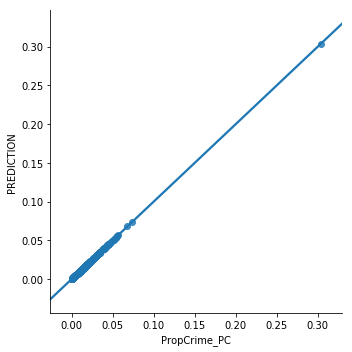

368 correctly predicted by model out of 375 entries


In [121]:
# How to predict values / code to use to generate number of correct vs all

# Is this way below acceptable?
correct = test_df[ round(test_df.loc[:,'PREDICTION'],2) == round(test_df.loc[:,'PropCrime_PC'],2)]

sns.lmplot(x='PropCrime_PC',y='PREDICTION',data=test_df)
plt.show()
print("{} correctly predicted by model out of {} entries".format(len(correct),len(test_df)))

# Missed a few entries here but model still has ~98% accuracy